In [1]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
data=pd.read_csv(r"G:\flip robo technologies\Ratings Prediction Project\New folder\Rattings_scraped.csv") 

In [3]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
data.head()

No. of Rows : 24652
No. of Columns : 2


,Rattings,Review
0,4,Colour is very unique. Performance is excellen...
1,4,impressive laptop
2,4,Product is superb goodI just love it there is...
3,5,You will never feel bad about any penny spend ...
4,3,Compare and buy. Good one but keyboard not wor...


In [4]:
data.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24652 entries, 0 to 24651
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  24652 non-null  int64 
 1   Review    24641 non-null  object
dtypes: int64(1), object(1)
memory usage: 385.3+ KB


## Data Integrity Check

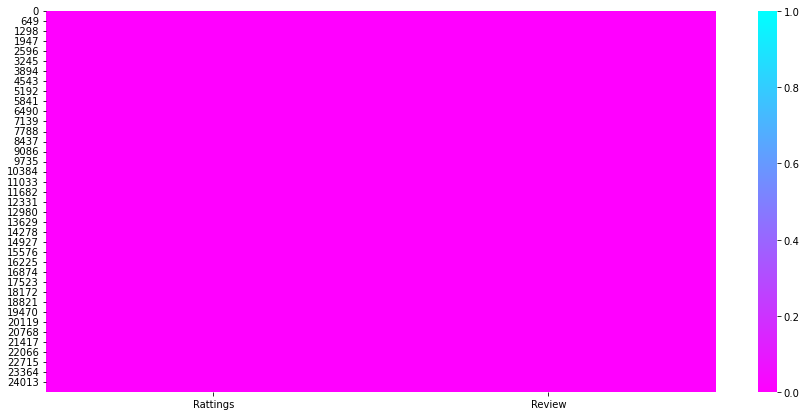

Rattings     0
Review      11
dtype: int64

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),cmap="cool_r")
plt.show()
data.isnull().sum()

### We will replace missing value in Review with 'Review Not Available'

In [7]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
data['Review'].fillna('Review Not Available',inplace=True)
data.isnull().sum().any()  #Checking after filling them


False

### No missing values are there

## Exploration of Target Variable Ratings

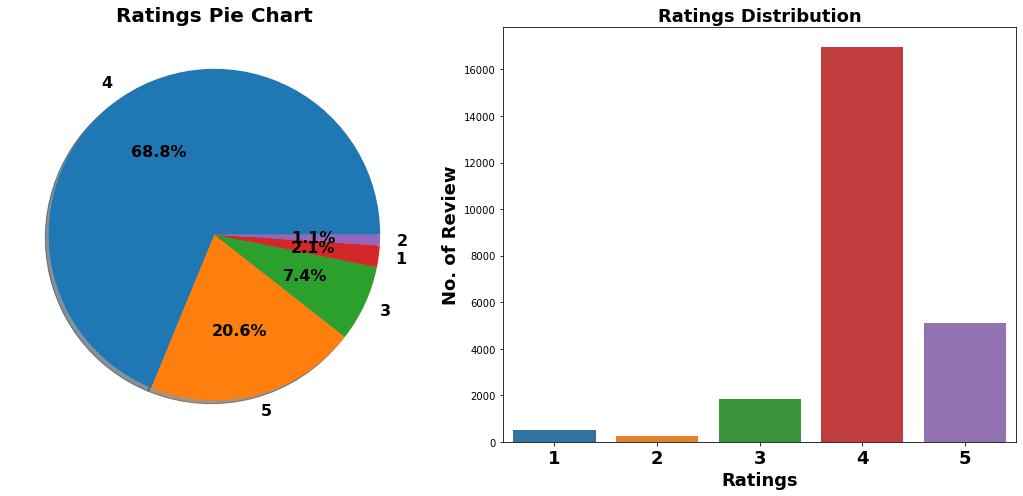

Value Counts of Rating:


4    16957
5     5087
3     1833
1      515
2      260
Name: Rattings, dtype: int64

In [8]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(15,7))
data['Rattings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Rattings',data=data,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
data['Rattings'].value_counts()

In [9]:
# Average Rating given by user
print("Average rating given by users is " + str(data['Rattings'].mean()))

Average rating given by users is 4.048231380821028


### Comment :
1. Around 68% customer given 4- star rating followed by 20% customer given lowest 5-star rating.

2. Average Rating is 4.0.

# Text Mining

## Operation perform are as followed:

#### Removing Punctuations and other special characters

#### Word Tokenzation

#### Removing Stop Words

#### Stemming and Lemmatising

#### Applying Count Vectoriser

In [10]:
#Importing required libraries
import re 
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SURAJ\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SURAJ\AppData\Roaming\nltk_data...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Applying Regular expression for text extraction.

In [12]:
def clean_text(data, data_column_name):
    
    #Converting all messages to lowercase
    data[data_column_name] = data[data_column_name].str.lower()

    #Replace email addresses with 'email'
    data[data_column_name] = data[data_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    data[data_column_name] = data[data_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    data[data_column_name] = data[data_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    data[data_column_name] = data[data_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    data[data_column_name] = data[data_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    data[data_column_name] = data[data_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    data[data_column_name] = data[data_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    data[data_column_name] = data[data_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    data[data_column_name] = data[data_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [13]:
#Calling the class
clean_text(data, 'Review')
data['Review'].tail(3)

24649    netgear orbi rbknumbr model among top notch me...
24650    month using quick review course costly think s...
24651    initially bought rbrnumbr assuming would suffi...
Name: Review, dtype: object

## Data Tokenization using RegexpTokenizer

In [14]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
data['Review'] = data['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
data.head()

,Rattings,Review
0,4,"[colour, unique, performance, excellent, offli..."
1,4,"[impressive, laptop]"
2,4,"[product, superb, goodi, love, numbr, isuue, b..."
3,5,"[never, feel, bad, penny, spend, product]"
4,3,"[compare, buy, good, one, keyboard, worked, wi..."


## Stemming & Lemmatization

In [20]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))


In [21]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))     
    return result

In [22]:
#Processing review with above Function
processed_review = []

for doc in data.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

24652


[['colour', 'uniqu', 'perform', 'excel', 'offlin', 'home', 'use'],
 ['impress', 'laptop'],
 ['product',
  'superb',
  'goodi',
  'love',
  'numbr',
  'isuu',
  'batteri',
  'backup',
  'good',
  'aft',
  'numbr',
  'charg',
  'maximum',
  'numbr',
  'numbrh',
  'run']]

In [23]:
data['clean_review']=processed_review  #Assigning this to the dataframe
data.head()

,Rattings,Review,clean_review
0,4,"[colour, unique, performance, excellent, offli...","[colour, uniqu, perform, excel, offlin, home, ..."
1,4,"[impressive, laptop]","[impress, laptop]"
2,4,"[product, superb, goodi, love, numbr, isuue, b...","[product, superb, goodi, love, numbr, isuu, ba..."
3,5,"[never, feel, bad, penny, spend, product]","[never, feel, bad, penni, spend, product]"
4,3,"[compare, buy, good, one, keyboard, worked, wi...","[compar, buy, good, one, keyboard, work, withi..."


In [24]:
data['Review'] = data['clean_review'].apply(lambda x:' '.join(y for y in x))
data.head()

,Rattings,Review,clean_review
0,4,colour uniqu perform excel offlin home use,"[colour, uniqu, perform, excel, offlin, home, ..."
1,4,impress laptop,"[impress, laptop]"
2,4,product superb goodi love numbr isuu batteri b...,"[product, superb, goodi, love, numbr, isuu, ba..."
3,5,never feel bad penni spend product,"[never, feel, bad, penni, spend, product]"
4,3,compar buy good one keyboard work within month...,"[compar, buy, good, one, keyboard, work, withi..."


## Plotting wordcloud for different ratings
### Word Cloud
Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.
The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.
The enlarged texts are the most number of words used there and small texts are the less number of words used.

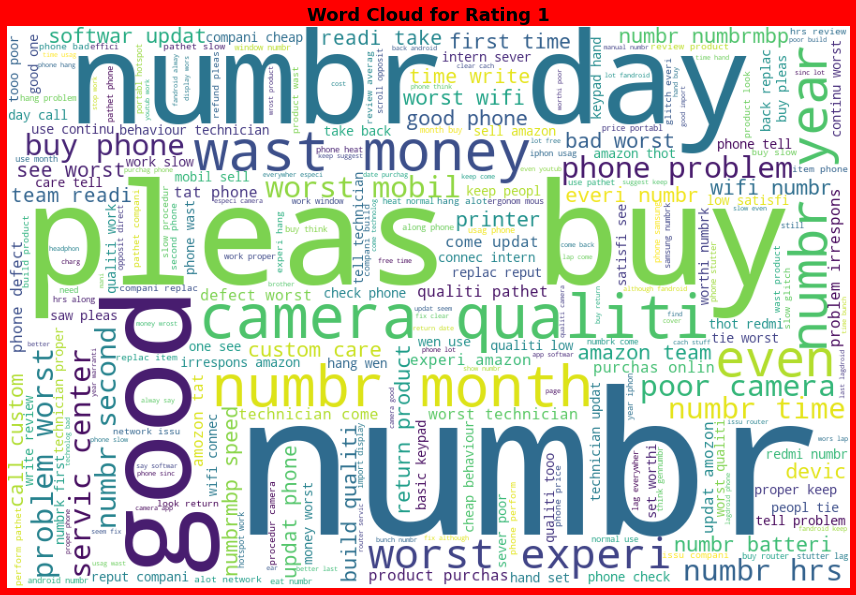

In [25]:
#Getting sense of words in Rating 1
one = data['Review'][data['Rattings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

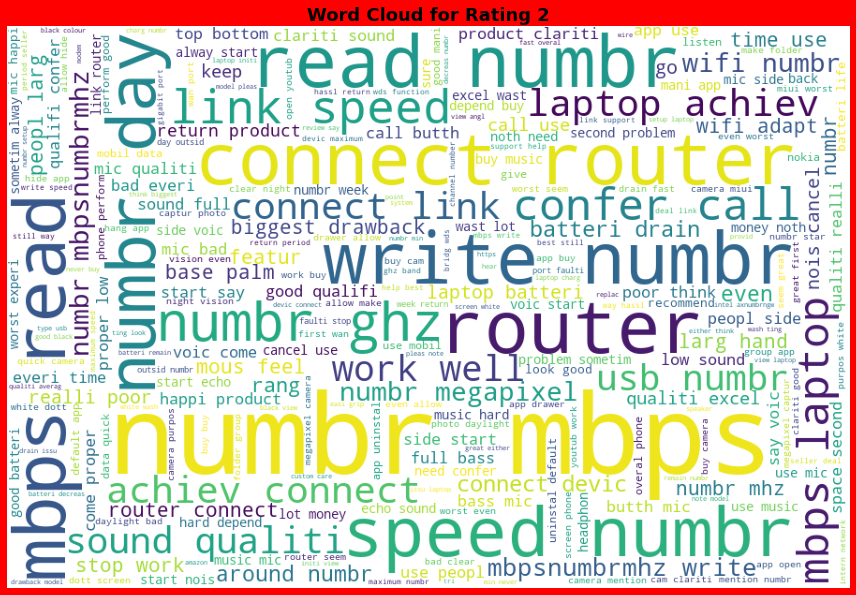

In [26]:
#Getting sense of words in Rating 2
one = data['Review'][data['Rattings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

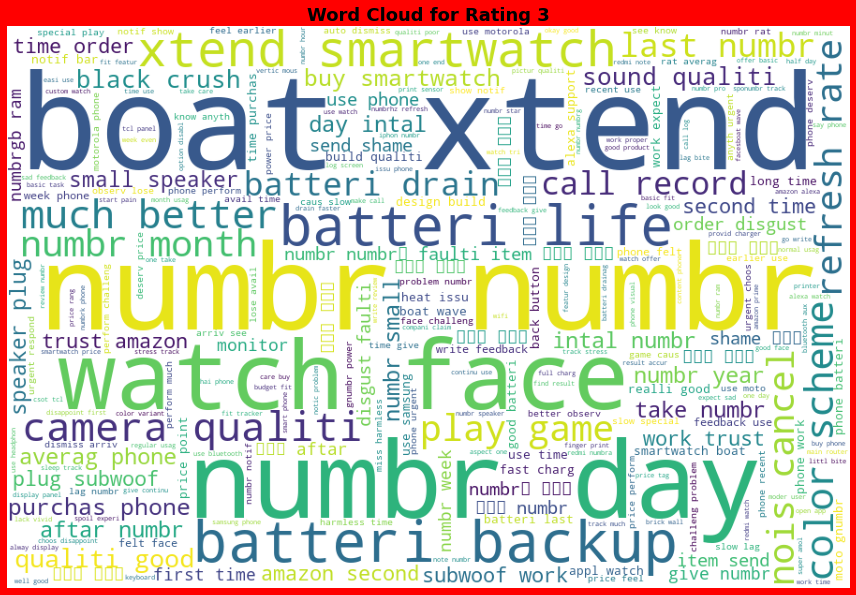

In [27]:

#Getting sense of words in Rating 3
one = data['Review'][data['Rattings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()


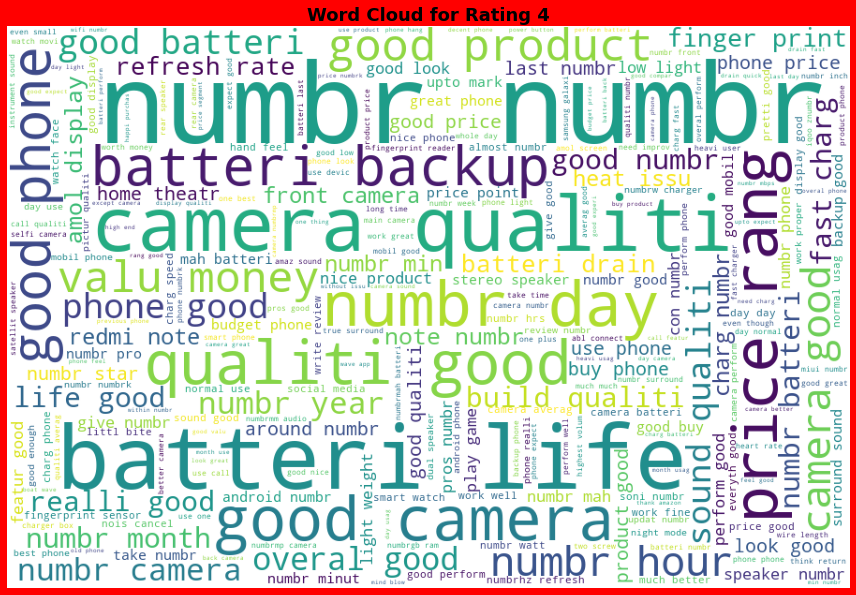

In [28]:

#Getting sense of words in Rating 4
one = data['Review'][data['Rattings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()



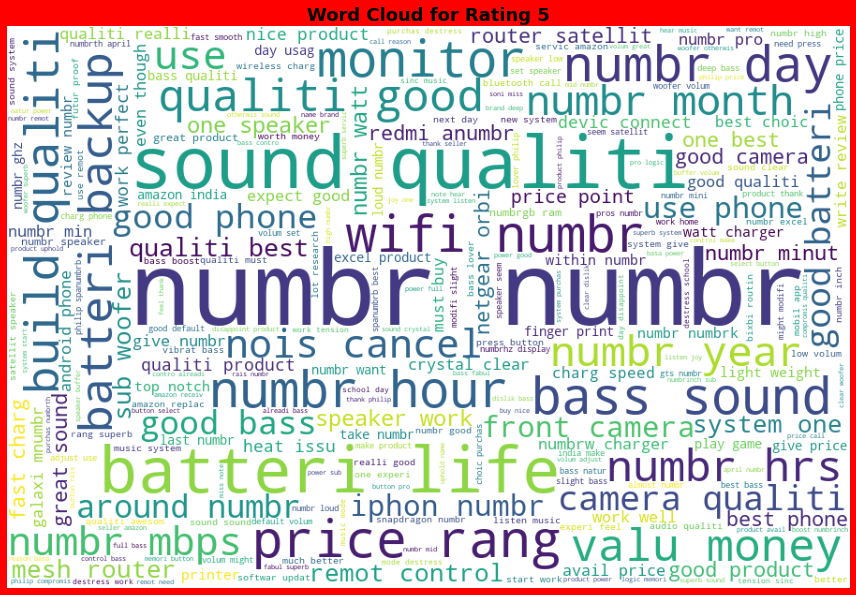

In [29]:
# Getting sense of words in Rating 5
one = data['Review'][data['Rattings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

# Text Vectorization to convert text into numeric

In [30]:
# Converting text into numeric using TfidataVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(data['Review'])
X=features
Y=data[['Rattings']]
print(X.shape)

print(Y.shape)


(24652, 7577)
(24652, 1)


# Machine Learning Model Building

In [31]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (17256, 7577)
Training target vector size: (17256, 1)
Test feature matrix size: (7396, 7577)
Test target vector size: (7396, 1)


In [32]:
# Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9057598702001082 on Random_state 69


In [33]:
# Logistics Regression
# Creating train_test_split using best random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=69, test_size=.3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=69, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))


Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9057598702001082


Confusion matrix of Logistics Regression : 
 [[ 127    0    5   27    1]
 [   0   43    1   23    6]
 [   0    0  315  197   10]
 [   0    0    4 5041   64]
 [   0    0    0  359 1173]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       1.00      0.79      0.89       160
           2       1.00      0.59      0.74        73
           3       0.97      0.60      0.74       522
           4       0.89      0.99      0.94      5109
           5       0.94      0.77      0.84      1532

    accuracy                           0.91      7396
   macro avg       0.96      0.75      0.83      7396
weighted avg       0.91      0.91      0.90      7396



## Logistics Regression Evaluation

In [34]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.75664165 0.78564186 0.7484787  0.79046653 0.47667343]
Mean CV Score : 0.7115804347459443
Std deviation : 0.11855919036815057


# Decision Tree Classifier

In [35]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))


Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.9515954570037858


Confusion matrix of Decision Tree Classifier : 
 [[ 140    0    1   18    1]
 [   1   64    0    8    0]
 [   3    0  457   53    9]
 [   4    5   12 5038   50]
 [   1    0    6  186 1339]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           1       0.94      0.88      0.91       160
           2       0.93      0.88      0.90        73
           3       0.96      0.88      0.92       522
           4       0.95      0.99      0.97      5109
           5       0.96      0.87      0.91      1532

    accuracy                           0.95      7396
   macro avg       0.95      0.90      0.92      7396
weighted avg       0.95      0.95      0.95      7396



In [36]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dt, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dt, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.79152302 0.8531738  0.7841785  0.81014199 0.47910751]
Mean CV Score : 0.743624961589612
Std deviation : 0.13441261875468832


# Random Forest Classifier

In [37]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9574094104921579


Confusion matrix of Random Forest Classifier : 
 [[ 140    0    0   19    1]
 [   0   64    0    9    0]
 [   0    0  454   66    2]
 [   0    0    0 5081   28]
 [   0    0    0  190 1342]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       1.00      0.88      0.93       160
           2       1.00      0.88      0.93        73
           3       1.00      0.87      0.93       522
           4       0.95      0.99      0.97      5109
           5       0.98      0.88      0.92      1532

    accuracy                           0.96      7396
   macro avg       0.98      0.90      0.94      7396
weighted avg       0.96      0.96      0.96      7396



In [38]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rf, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rf, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.79760698 0.83492192 0.76977688 0.80669371 0.47586207]
Mean CV Score : 0.7369723112008598
Std deviation : 0.13220171011175647


# AdaBoost Classifier

In [39]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
y_pred=ad.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.7174148188209843


Confusion matrix of AdaBoost Classifier : 
 [[  66    1    0   83   10]
 [   0   12    1   36   24]
 [   6    3   48  442   23]
 [   8    7   48 4909  137]
 [   8   12   11 1230  271]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           1       0.75      0.41      0.53       160
           2       0.34      0.16      0.22        73
           3       0.44      0.09      0.15       522
           4       0.73      0.96      0.83      5109
           5       0.58      0.18      0.27      1532

    accuracy                           0.72      7396
   macro avg       0.57      0.36      0.40      7396
weighted avg       0.68      0.72      0.65      7396



In [40]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(ad, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',ad, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.68931251 0.68890692 0.6821501  0.68194726 0.6137931 ]
Mean CV Score : 0.6712219789278657
Std deviation : 0.028887906397827477


# Gradient Boosting Classifier

In [41]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
y_pred=gbc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))


Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.8599242833964305


Confusion matrix of Gradient Boosting Classifier : 
 [[ 138    0    0   21    1]
 [   0   64    0    8    1]
 [   0    1  214  288   19]
 [   1    3    2 5073   30]
 [   0    1    2  658  871]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           1       0.99      0.86      0.92       160
           2       0.93      0.88      0.90        73
           3       0.98      0.41      0.58       522
           4       0.84      0.99      0.91      5109
           5       0.94      0.57      0.71      1532

    accuracy                           0.86      7396
   macro avg       0.94      0.74      0.80      7396
weighted avg       0.88      0.86      0.84      7396



In [42]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(gbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', gbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.72419388 0.75542486 0.74320487 0.78884381 0.50324544]
Mean CV Score : 0.7029825712479274
Std deviation : 0.10206372776672787


We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.


## Hyper Parameter Tuning : GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.946 total time=  31.7s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.945 total time=  32.6s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.946 total time=  31.1s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.947 total time=  29.5s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.944 total time=  30.3s
[CV 1/5; 2/12] STAR

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [44]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

# Final Model

In [45]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 75,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9576798269334775


Confusion matrix of Random Forest Classifier : 
 [[ 140    0    0   19    1]
 [   0   64    0    9    0]
 [   0    0  454   66    2]
 [   0    0    0 5086   23]
 [   0    0    0  193 1339]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       1.00      0.88      0.93       160
           2       1.00      0.88      0.93        73
           3       1.00      0.87      0.93       522
           4       0.95      1.00      0.97      5109
           5       0.98      0.87      0.92      1532

    accuracy                           0.96      7396
   macro avg       0.99      0.90      0.94      7396
weighted avg       0.96      0.96      0.96      7396



In [46]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(Final_mod, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', Final_mod, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=75) :

CVScore : [0.79598459 0.83532752 0.76754564 0.81298174 0.49979716]
Mean CV Score : 0.7423273301376441
Std deviation : 0.12326964685986933


In [47]:
# Saving model
import joblib
joblib.dump(Final_mod,'Review_Rating_Prediction.pkl')
['Review_Rating_Prediction.pkl']

['Review_Rating_Prediction.pkl']